# First things first
This jupyter notebook should be run in a virtual environment.
The virtual environment is not pushed to git.

# put picture here


$$
\sin(\alpha) = \frac{\text{Gegenkathete}}{\text{Hypotenuse}} \\

\cos(\alpha) = \frac{\text{Ankathete}}{\text{Hypotenuse}} \\

\tan(\alpha) = \frac{\text{Gegenkathete}}{\text{Ankathete}}
$$

# general triangle


![image-2.png](triangle.png)

$$
\cos(\alpha) = \frac{b^2 + c^2 - a^2}{2 \cdot b \cdot c} \\

\cos(\beta) = \frac{a^2 + c^2 - b^2}{2 \cdot a \cdot c} \\

\cos(\gamma) = \frac{a^2 + b^2 - c^2}{2 \cdot a \cdot b }
$$

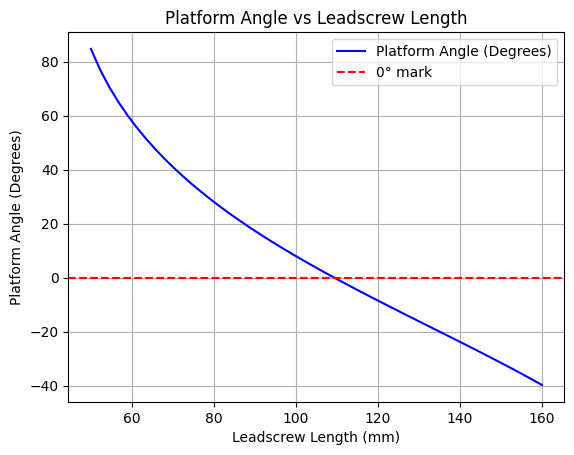

In [40]:
# calculate angle for linear input motion
import numpy as np
import matplotlib.pyplot as plt
# all length are in mm

# here are the fixed lengths
l_platform = 70
l_pushbar = 120
l_leadscrew_offset = 20

l_leadscrew_zero =  0

# these are variable lengths

l_leadscrew_var = np.linspace(50, 160, 50)
# l_leadscrew_offset = np.linspace(20, 50, 5)

# l_leadscrew_var = 70
# possible because there is a 90° angle
l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)

angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi )

gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi )

angle_platform = gamma_platform + angle_offset -90
#  Plotting the results
plt.plot(l_leadscrew_var, angle_platform, label='Platform Angle (Degrees)', color='b')

# Mark the 0° line with a vertical red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title('Platform Angle vs Leadscrew Length')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

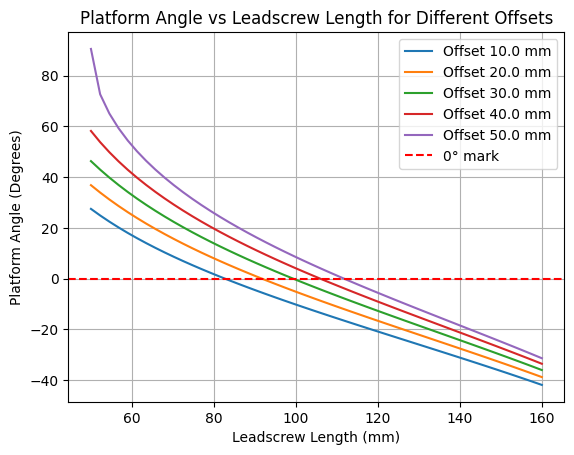

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_platform = 90
l_pushbar = 115

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(50, 160, 50)

# Define variable leadscrew offset values
l_leadscrew_offsets = np.linspace(10, 50, 5)  # e.g., 4 values from 10mm to 30mm

# Plot the results for each leadscrew offset
for i, l_leadscrew_offset in enumerate(l_leadscrew_offsets):
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90
    
    # Plot each offset in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Offset {l_leadscrew_offset:.1f} mm')

# Mark the 90° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title('Platform Angle vs Leadscrew Length for Different Offsets')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


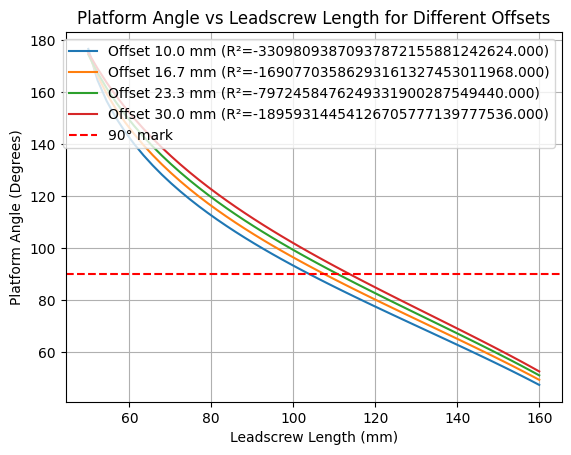

The most linear offset is 23.3 mm with R²=-7972458476249331900287549440.000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Fixed lengths
l_platform = 70
l_pushbar = 120

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(50, 160, 50)

# Define variable leadscrew offset values
l_leadscrew_offsets = np.linspace(10, 30, 4)  # 4 values from 10mm to 30mm

# To store R-squared values for each offset
r_squared_values = []

# Define a function to calculate R-squared in PyTorch
def r_squared(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# Plot the results for each leadscrew offset
for i, l_leadscrew_offset in enumerate(l_leadscrew_offsets):
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset
    
    # Convert data to PyTorch tensors
    x_tensor = torch.tensor(l_leadscrew_var, dtype=torch.float32).unsqueeze(1)  # input variable (leadscrew length)
    y_tensor = torch.tensor(angle_platform, dtype=torch.float32).unsqueeze(1)  # target variable (angle)

    # Define a simple linear regression model
    model = nn.Linear(1, 1)
    
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    
    # Training the linear regression model
    num_epochs = 10
    for epoch in range(num_epochs):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_tensor)
        
        # Compute the loss
        loss = criterion(y_pred, y_tensor)
        
        # Zero gradients, backpropagate, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Calculate R-squared value
    y_pred_final = model(x_tensor)
    r2 = r_squared(y_tensor, y_pred_final).item()  # Convert to a Python float
    r_squared_values.append(r2)  # Store R-squared value
    
    # Plot each offset in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Offset {l_leadscrew_offset:.1f} mm (R²={r2:.3f})')

# Mark the 90° line with a red dashed line
plt.axhline(90, color='r', linestyle='--', label='90° mark')

# Labels and title
plt.title('Platform Angle vs Leadscrew Length for Different Offsets')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Find the most linear line
best_fit_index = np.argmax(r_squared_values)  # Get the index of the highest R^2 value
most_linear_offset = l_leadscrew_offsets[best_fit_index]  # Get the corresponding offset

# Output the results
print(f"The most linear offset is {most_linear_offset:.1f} mm with R²={r_squared_values[best_fit_index]:.3f}")


/tmp/ipykernel_6430/1644353634.py:23: RuntimeWarning: invalid value encountered in arccos
  gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)


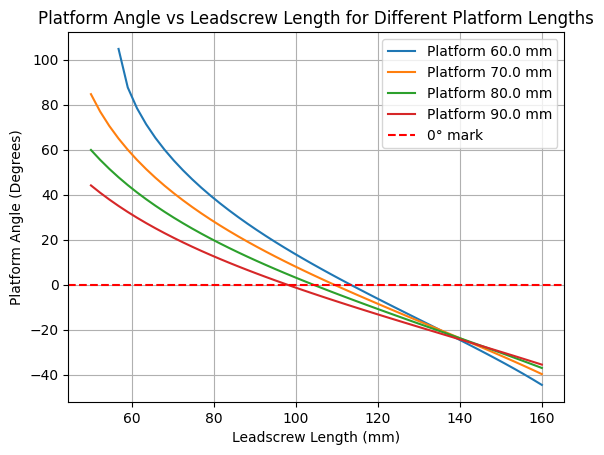

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_pushbar = 120  # Keep this fixed
l_leadscrew_offset = 20  # Keep this fixed

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(50, 160, 50)

# Define variable platform lengths (l_platform)
l_platforms = np.linspace(60, 90, 4)  # 4 values for l_platform from 60mm to 90mm

# Plot the results for each platform length
for l_platform in l_platforms:
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90
    
    # Plot each platform length in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Platform {l_platform:.1f} mm')

# Mark the 0° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title('Platform Angle vs Leadscrew Length for Different Platform Lengths')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


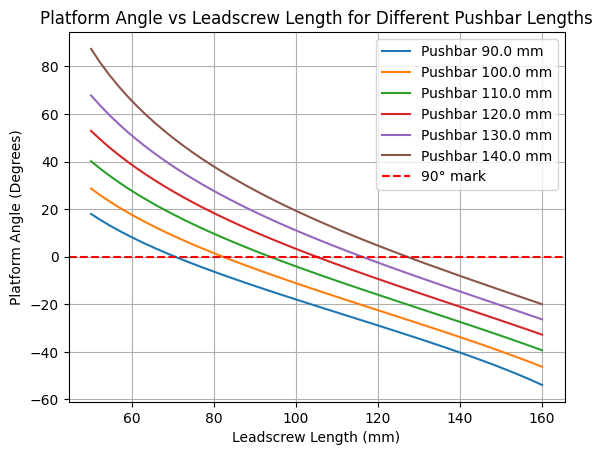

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_platform = 90  # Keep this fixed
l_leadscrew_offset = 30  # Keep this fixed

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(50, 160, 50)

# Define variable pushbar lengths (l_pushbar)
l_pushbars = np.linspace(90, 140, 6)  # 4 values for l_pushbar from 110mm to 140mm

# Plot the results for each pushbar length
for l_pushbar in l_pushbars:
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90
    
    # Plot each pushbar length in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Pushbar {l_pushbar:.1f} mm')

# Mark the 0° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='90° mark')

# Labels and title
plt.title('Platform Angle vs Leadscrew Length for Different Pushbar Lengths')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
